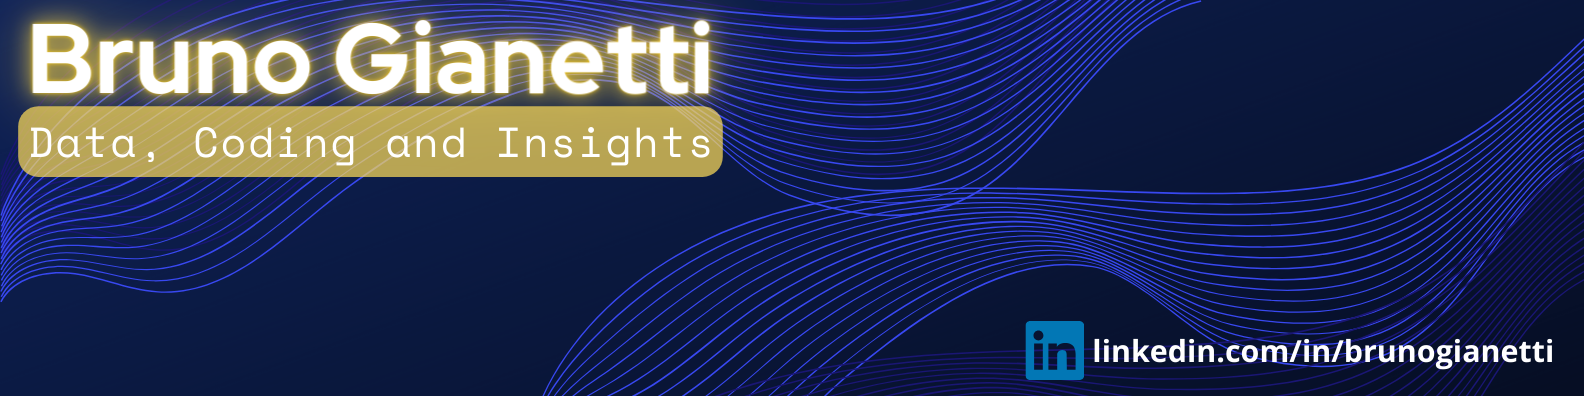

# Projeto de Machine Learning: Análise de Custos para Exames Oncológicos.

#### A proposta visa explorar os dados e propor soluções afim de reduzir os custos laboratoriais para determinados tipos de câncer.

In [1]:
import pandas as pd

In [2]:
resultados_exames = pd.read_csv('exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
resultados_exames.shape

(569, 35)

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [5]:
# Tratando os NaN

resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [6]:
# Modelo utilizado será o Random Forest
# Modelo que será utiliza diversas árvores de decisão.

from sklearn.ensemble import RandomForestClassifier


valores_exames_v1 = valores_exames.drop(columns='exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print('Resultado da classificação %.2f%%'%(classificador.score(teste_x, teste_y)*100))

Resultado da classificação 96.49%


In [7]:
from sklearn.dummy import DummyClassifier


classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
print('Resultado da classificação boba %.2f%%' %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba 63.16%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

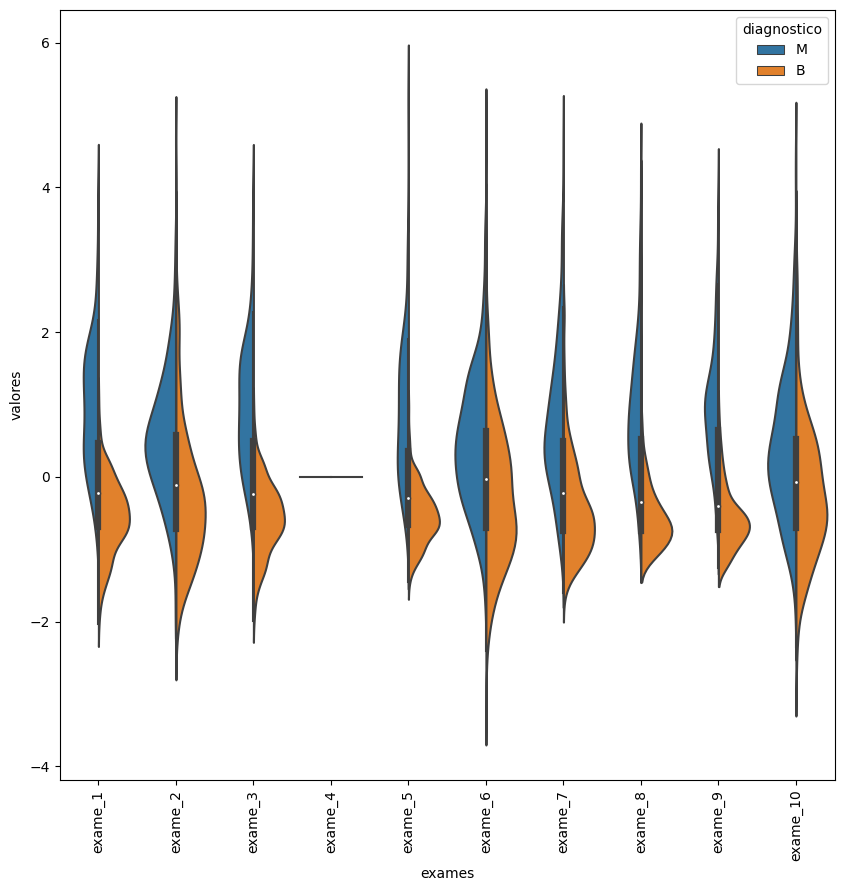

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10, 10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
plt.xticks(rotation = 90)

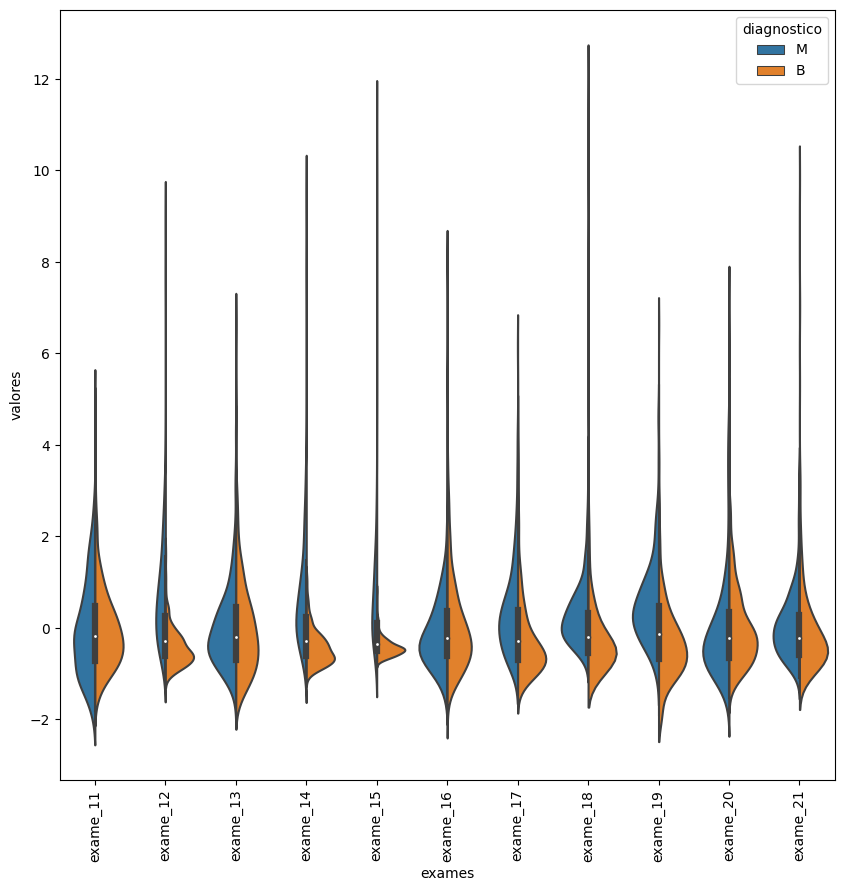

In [9]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

  plt.figure(figsize = (10, 10))
  sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)
  plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

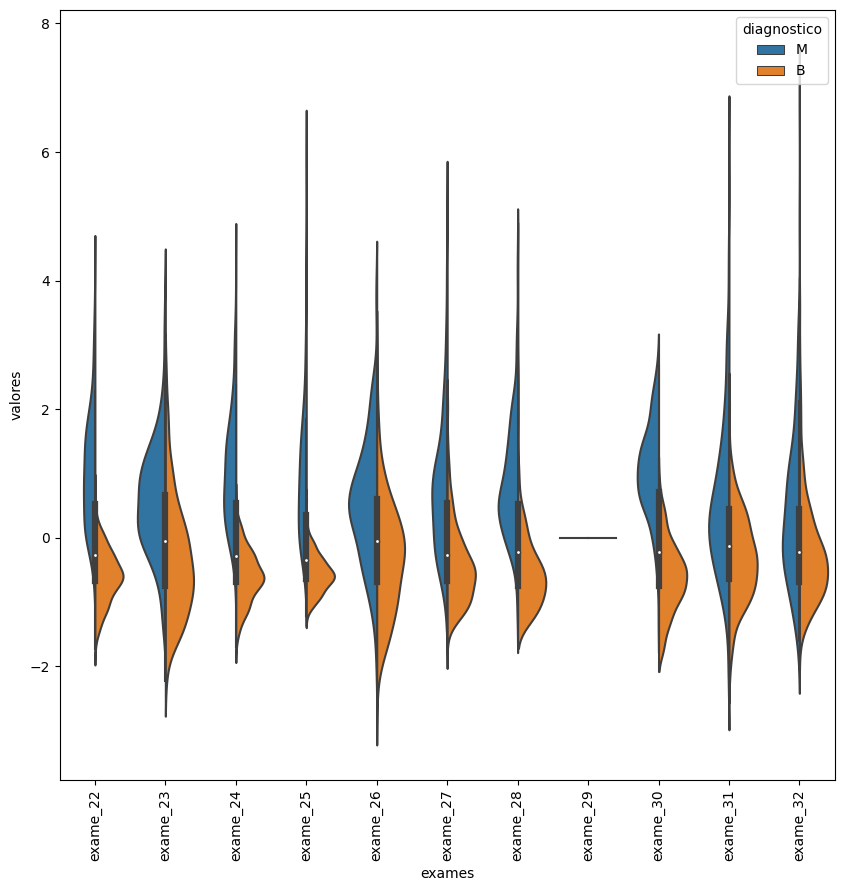

In [10]:
grafico_violino(valores_exames_v2, 21, 33)

In [11]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)
  print('Resultado da classificação %.2f%%'%(classificador.score(teste_x, teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 92.98%


<Axes: >

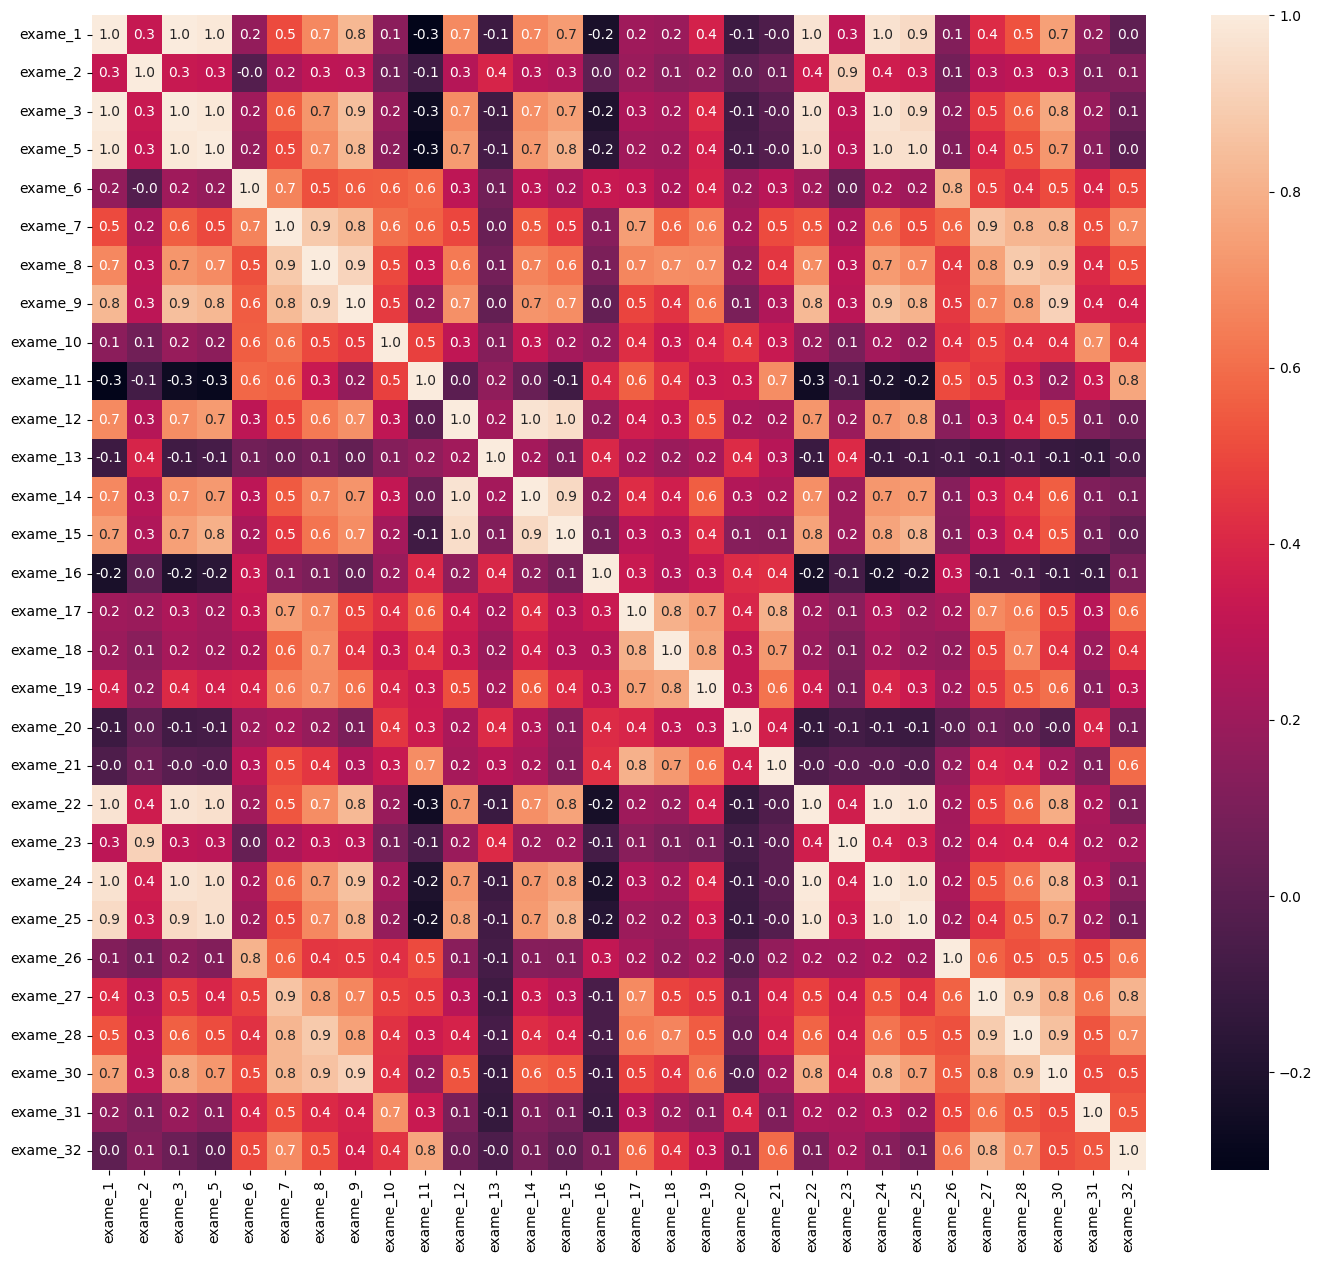

In [12]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [13]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [15]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1] #Query
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [16]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [17]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [18]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


# Selecionando as melhores Features

## Pontuação das features e Matriz de Confusão.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [20]:
# precisamos normalizar os exames porque a distribuição Chi2 não aceita valores negativos.
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_24"]))

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [21]:
treino_kbest.shape

(398, 5)

In [22]:
teste_kbest.shape

(171, 5)

In [23]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação 92.40%


In [24]:
from sklearn.metrics import confusion_matrix


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [25]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 19.049999999999997, 'Predição'), Text(46.25, 0.5, 'Real')]

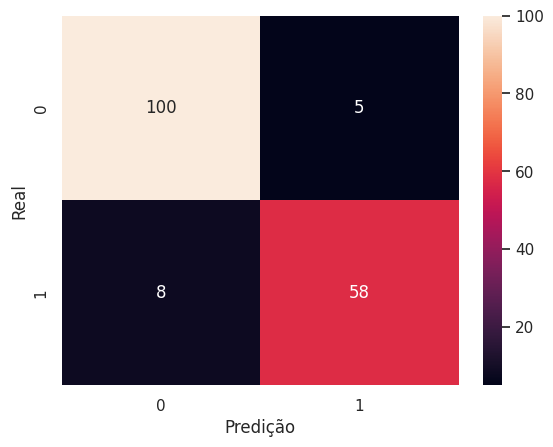

In [26]:
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")

# Seleção com RFE

## Pontuando as features

Resultado da classificação 90.06%


[Text(0.5, 19.049999999999997, 'Predição'), Text(46.25, 0.5, 'Real')]

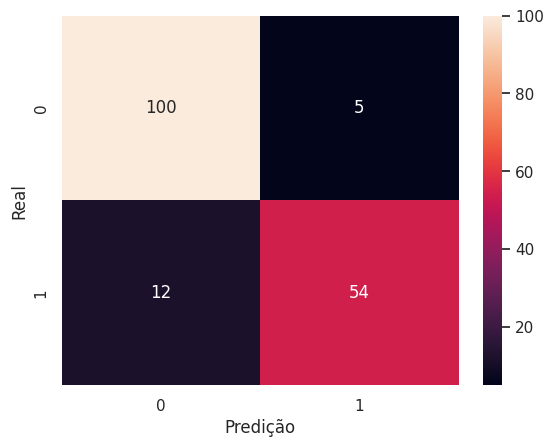

In [27]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfe, treino_y)

classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)*100))

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")


# RFE Cross-Validation

### Estratificando o banco de dados e avaliando quantas (e quais) features são necessárias para gerar o melhor resultado possível.

Resultado da classificação 92.98%


[Text(0.5, 19.049999999999997, 'Predição'), Text(46.25, 0.5, 'Real')]

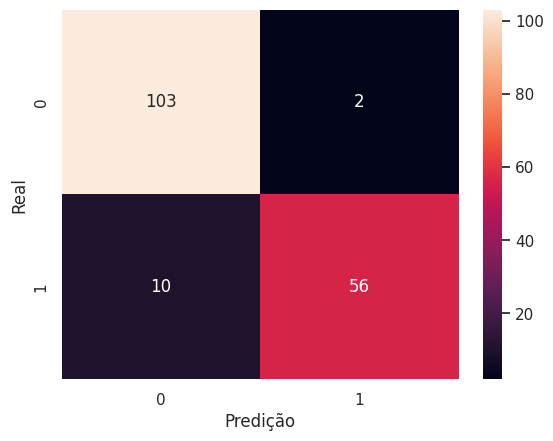

In [28]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring = "accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)*100))

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = "Predição", ylabel = "Real")

In [29]:
#quantas features (que são as melhores) foram selecionadas?
selecionador_rfecv.n_features_

26

In [30]:
#quais features foram selecionadas?
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [34]:
len(selecionador_rfecv.cv_results_)

7

<function matplotlib.pyplot.show(close=None, block=None)>

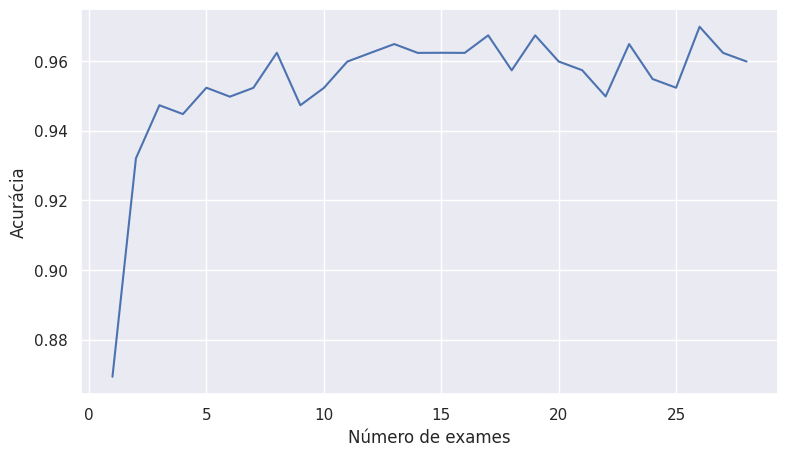

In [42]:
#por que ele escolheu 26 features?
plt.figure(figsize = (9,5))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) +1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

In [43]:
#reduzo o nº de features de 5 para 2 para gerar uma visualização de dados em plano
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfe, treino_y)
classificador.fit(treino_rfe, treino_y)

valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [44]:
valores_exames_v7.shape

(569, 2)

<Axes: >

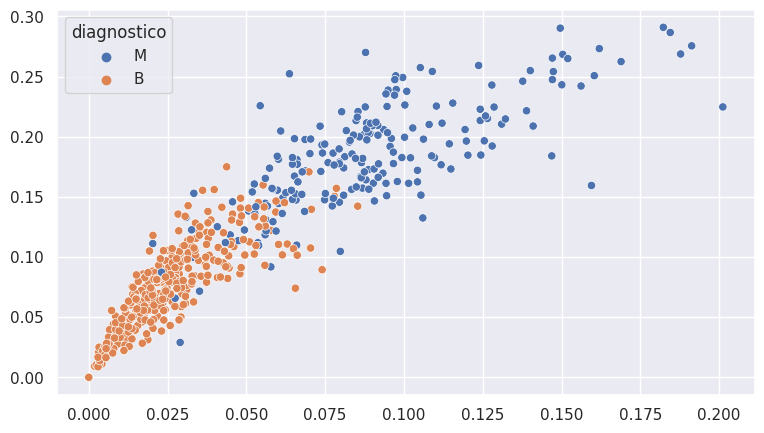

In [46]:
plt.figure(figsize=(9,5))
sns.scatterplot(x= valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue= diagnostico)

In [50]:
#como perdemos muita informação utilizando apenas 2 dimensões no gráfico acima, então
#teremos que utilizar técnicas para manter o máximo de informações possível.
from sklearn.decomposition import PCA


pca = PCA(n_components = 2)
# o pca se aplica melhor a dados normalizados, por isso trocamos valores_exames_v5 em vez de v6
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [51]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<Axes: >

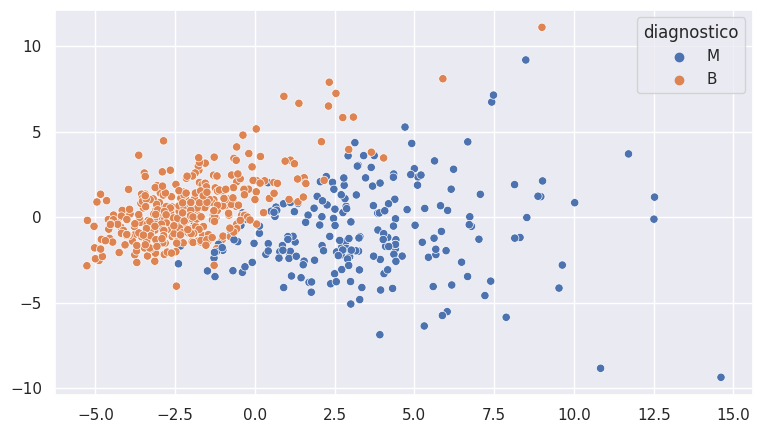

In [52]:
plt.figure(figsize=(9,5))
sns.scatterplot(x= valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue= diagnostico)

<Axes: >

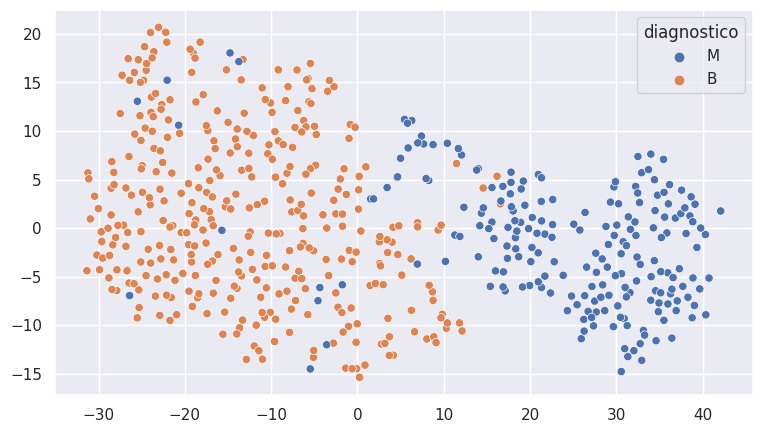

In [55]:
#aplicando o TSNE como padronizador de distâncias entre pontos
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(9,5))
sns.scatterplot(x= valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue= diagnostico)